# Sampling the Library of Babel
## Can a probabilistic computer find meaning in chaos?

This notebook explores whether an Energy-Based Model (EBM) can discover structure in pure randomness, inspired by Borges's Library of Babel and implemented using Extropic-style THRML framework.

**Core Question**: *If you give a probabilistic computer a universe of meaningless text, can it learn pockets of order?*


## 1. Setup and Imports


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dataset import (
    generate_babel_dataset,
    generate_babel_strings,
    ALPHABET,
    ALPHABET_SIZE
)
from babel_library import BabelEBM
from training import train_ebm, train_with_annealing
from visualization import (
    visualize_bigram_weights,
    visualize_character_frequencies,
    visualize_pattern_emergence,
    visualize_sequence_comparison,
    visualize_training_history,
    analyze_patterns,
    create_babel_map
)

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

print("Setup complete!")


Setup complete!


## 2. Generate the Mini Library of Babel

Create a dataset of random sequences representing the Library of Babel.


In [7]:
# Configuration
N_SEQUENCES = 1000
SEQUENCE_LENGTH = 200
SEED = 42

print(f"Generating {N_SEQUENCES} random Babel sequences of length {SEQUENCE_LENGTH}...")
print(f"Alphabet: {''.join(ALPHABET)}")
print(f"Alphabet size: {ALPHABET_SIZE}")

# Generate dataset
data = generate_babel_dataset(n_sequences=N_SEQUENCES, length=SEQUENCE_LENGTH, seed=SEED)
data_strings = generate_babel_strings(n_sequences=N_SEQUENCES, length=SEQUENCE_LENGTH, seed=SEED)

print(f"\nGenerated {len(data)} sequences")
print("\nSample sequences:")
for i, seq in enumerate(data_strings[:5]):
    print(f"  {i+1}. {seq[:80]}...")


Generating 1000 random Babel sequences of length 200...
Alphabet: abcdefghijklmnopqrstuvwxyz ,.
Alphabet size: 29

Generated 1000 sequences

Sample sequences:
  1. gt.okh.ugzswkkxudhxcvubxlfb,ualzv.lyq  j,,pooslwtycesguigrdy,nrzizubt,o,gl.hocnq...
  2. sv,bjmyuf,,lltkzw,ygaay ytmicgfh ieasjlxo vxitqqztlgbcqeqxq qbb,vweaasbulzfwdwkx...
  3. nffmsvh  bua,oae,.psdcqql,.nufc,iex.qnuc,at.uwacryjvzchnxrovwb jbzqhaikvpg.jwzcr...
  4. ugdaewzjvedbtjzszaxemdpxpwbq, txlrc,aa.skelcaahjkl.mlnb.srcwqzh.zjzbsigdzurmk.xd...
  5. .lvg jzsgcmmr,zt,h.igacm,y,qyxafufzlmm.oupvuk,edcstyroiqnoauvvcpwykljphflx,uhz,d...


## 3. Visualize Random Data

Let's see what pure randomness looks like.


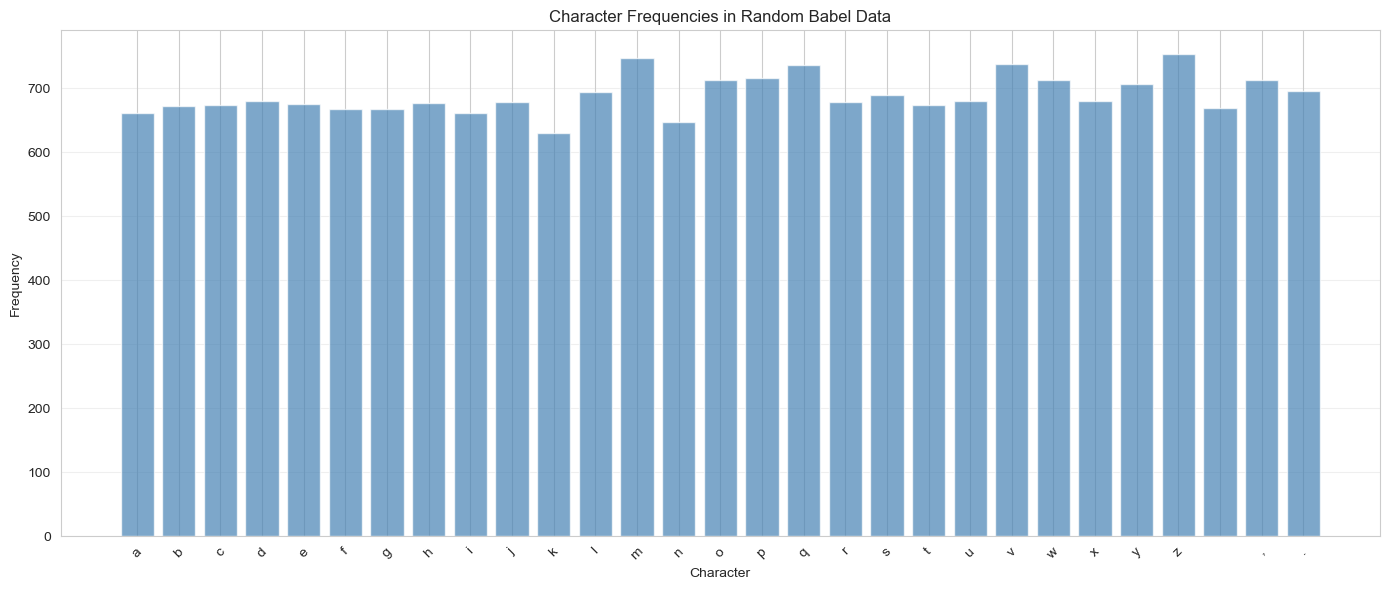

=== Pattern Analysis ===
Total characters: 20000
Vowel ratio: 0.170
Space ratio: 0.034
Punctuation ratio: 0.070

Top 10 Bigrams:
  'vp': 39
  'zy': 38
  'nx': 38
  'mw': 38
  'qi': 38
  't.': 37
  'vu': 36
  '.i': 36
  'ym': 36
  'gz': 35

Repeating Patterns:
  'aas': 5
  'qiq': 5
  'ttu': 5
  'hh ': 5
  'cca': 4
  'bb,': 4
  'rnr': 4
  'qql': 4
  'npn': 4
  'zwz': 4


{'total_chars': 20000,
 'char_frequencies': {'a': 662,
  'b': 673,
  'c': 674,
  'd': 680,
  'e': 676,
  'f': 668,
  'g': 668,
  'h': 677,
  'i': 662,
  'j': 679,
  'k': 631,
  'l': 695,
  'm': 748,
  'n': 647,
  'o': 713,
  'p': 717,
  'q': 737,
  'r': 679,
  's': 689,
  't': 674,
  'u': 681,
  'v': 738,
  'w': 713,
  'x': 680,
  'y': 707,
  'z': 753,
  ' ': 670,
  ',': 713,
  '.': 696},
 'vowel_ratio': 0.1697,
 'space_ratio': 0.0335,
 'punctuation_ratio': 0.07045,
 'top_bigrams': [('vp', 39),
  ('zy', 38),
  ('nx', 38),
  ('mw', 38),
  ('qi', 38),
  ('t.', 37),
  ('vu', 36),
  ('.i', 36),
  ('ym', 36),
  ('gz', 35)],
 'repeating_patterns': [('aas', 5),
  ('qiq', 5),
  ('ttu', 5),
  ('hh ', 5),
  ('cca', 4),
  ('bb,', 4),
  ('rnr', 4),
  ('qql', 4),
  ('npn', 4),
  ('zwz', 4)]}

In [8]:
visualize_character_frequencies(data_strings[:100], title="Character Frequencies in Random Babel Data")
analyze_patterns(data_strings[:100], verbose=True)


## 4. Initialize the EBM Model

Create an Energy-Based Model that will learn structure from the random data.


In [ ]:
model = BabelEBM(
    sequence_length=SEQUENCE_LENGTH,
    alphabet_size=ALPHABET_SIZE,
    init_scale=0.1
)

print("Model initialized!")
print(f"Sequence length: {model.sequence_length}")
print(f"Alphabet size: {model.alphabet_size}")
print(f"Weight matrix shape: {model.weights.shape}")

# Sample from untrained model
print("\nSampling from untrained model...")
untrained_samples = model.sample(n_samples=5, n_burnin=50, temperature=1.0)
for i, sample in enumerate(untrained_samples):
    print(f"  {i+1}. {sample[:80]}...")


Model initialized!
Sequence length: 200
Alphabet size: 29
Weight matrix shape: (199, 29, 29)

Sampling from untrained model...
  1. yhwojxag rjymssckf,gy.kxgltyvgjmldz.,io,dnepxhnknwojweupuu tnkhrqhvhxlonqgxfh,ni...
  2. yhwojxag rjymssckf,gy.kxgltyvgjmldz.,io,dnepxhnknwojweupuu tnkhrqhvhxlonqgxfh,ni...
  3. yhwojxag rjymssckf,gy.kxgltyvgjmldz.,io,dnepxhnknwojweupuu tnkhrqhvhxlonqgxfh,ni...
  4. yhwojxag rjymssckf,gy.kxgltyvgjmldz.,io,dnepxhnknwojweupuu tnkhrqhvhxlonqgxfh,ni...
  5. yhwojxag rjymssckf,gy.kxgltyvgjmldz.,io,dnepxhnknwojweupuu tnkhrqhvhxlonqgxfh,ni...


## 5. Train the Model

Train the EBM to learn patterns in the random data using KL-gradient estimation (moment matching).


In [9]:
# Training configuration
N_EPOCHS = 100
LEARNING_RATE = 0.01
METHOD = "pseudo_likelihood"  # Use "kl_gradient" for full THRML-style training (slower)

print(f"Training for {N_EPOCHS} epochs...")
trained_model, history = train_ebm(
    model,
    data,
    n_epochs=N_EPOCHS,
    learning_rate=LEARNING_RATE,
    method=METHOD,
    n_samples=50,  # For KL-gradient
    temperature=1.0,
    verbose=True
)


Training for 100 epochs...
Training Babel EBM with pseudo_likelihood method...
Data: 1000 sequences, Length: 200
Epochs: 100, Learning rate: 0.01


100%|██████████| 100/100 [15:51<00:00,  9.52s/it]


Training complete!
Final data energy: 0.0495
Final model energy: -4.0093


## 6. Visualize Training Progress


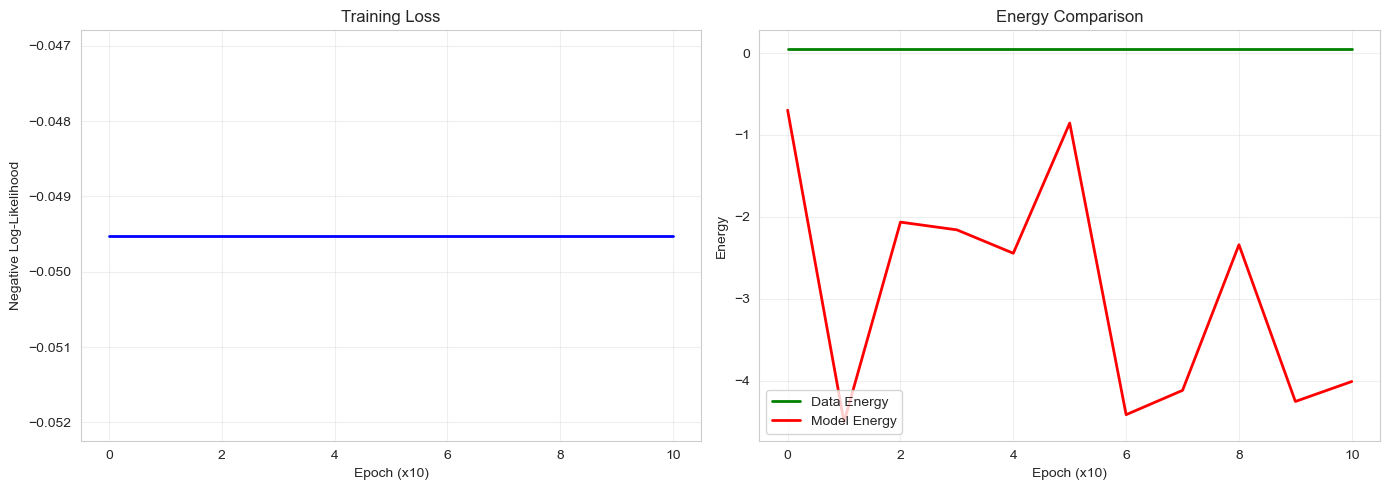

In [10]:
visualize_training_history(history)


## 7. Sample from Trained Model

Now let's see what the model has learned. Does it generate patterns?


In [11]:
print("Sampling from trained model...")
trained_samples = trained_model.sample(
    n_samples=20,
    n_burnin=100,
    n_steps_per_sample=10,
    temperature=1.0
)

print("\nSample sequences from trained model:")
for i, sample in enumerate(trained_samples[:10]):
    print(f"  {i+1}. {sample[:80]}...")


Sampling from trained model...

Sample sequences from trained model:
  1. yhwojxag rjymssckf,gy.kxgltyvgjmldz.,io,dnepxhnknwojweupuu tnkhrqhvhxlonqgxfh,ni...
  2. yhwojxag rjymssckf,gy.kxgltyvgjmldz.,io,dnepxhnknwojweupuu tnkhrqhvhxlonqgxfh,ni...
  3. yhwojxag rjymssckf,gy.kxgltyvgjmldz.,io,dnepxhnknwojweupuu tnkhrqhvhxlonqgxfh,ni...
  4. yhwojxag rjymssckf,gy.kxgltyvgjmldz.,io,dnepxhnknwojweupuu tnkhrqhvhxlonqgxfh,ni...
  5. yhwojxag rjymssckf,gy.kxgltyvgjmldz.,io,dnepxhnknwojweupuu tnkhrqhvhxlonqgxfh,ni...
  6. yhwojxag rjymssckf,gy.kxgltyvgjmldz.,io,dnepxhnknwojweupuu tnkhrqhvhxlonqgxfh,ni...
  7. yhwojxag rjymssckf,gy.kxgltyvgjmldz.,io,dnepxhnknwojweupuu tnkhrqhvhxlonqgxfh,ni...
  8. yhwojxag rjymssckf,gy.kxgltyvgjmldz.,io,dnepxhnknwojweupuu tnkhrqhvhxlonqgxfh,ni...
  9. yhwojxag rjymssckf,gy.kxgltyvgjmldz.,io,dnepxhnknwojweupuu tnkhrqhvhxlonqgxfh,ni...
  10. yhwojxag rjymssckf,gy.kxgltyvgjmldz.,io,dnepxhnknwojweupuu tnkhrqhvhxlonqgxfh,ni...


## 8. Compare Random vs Model Samples


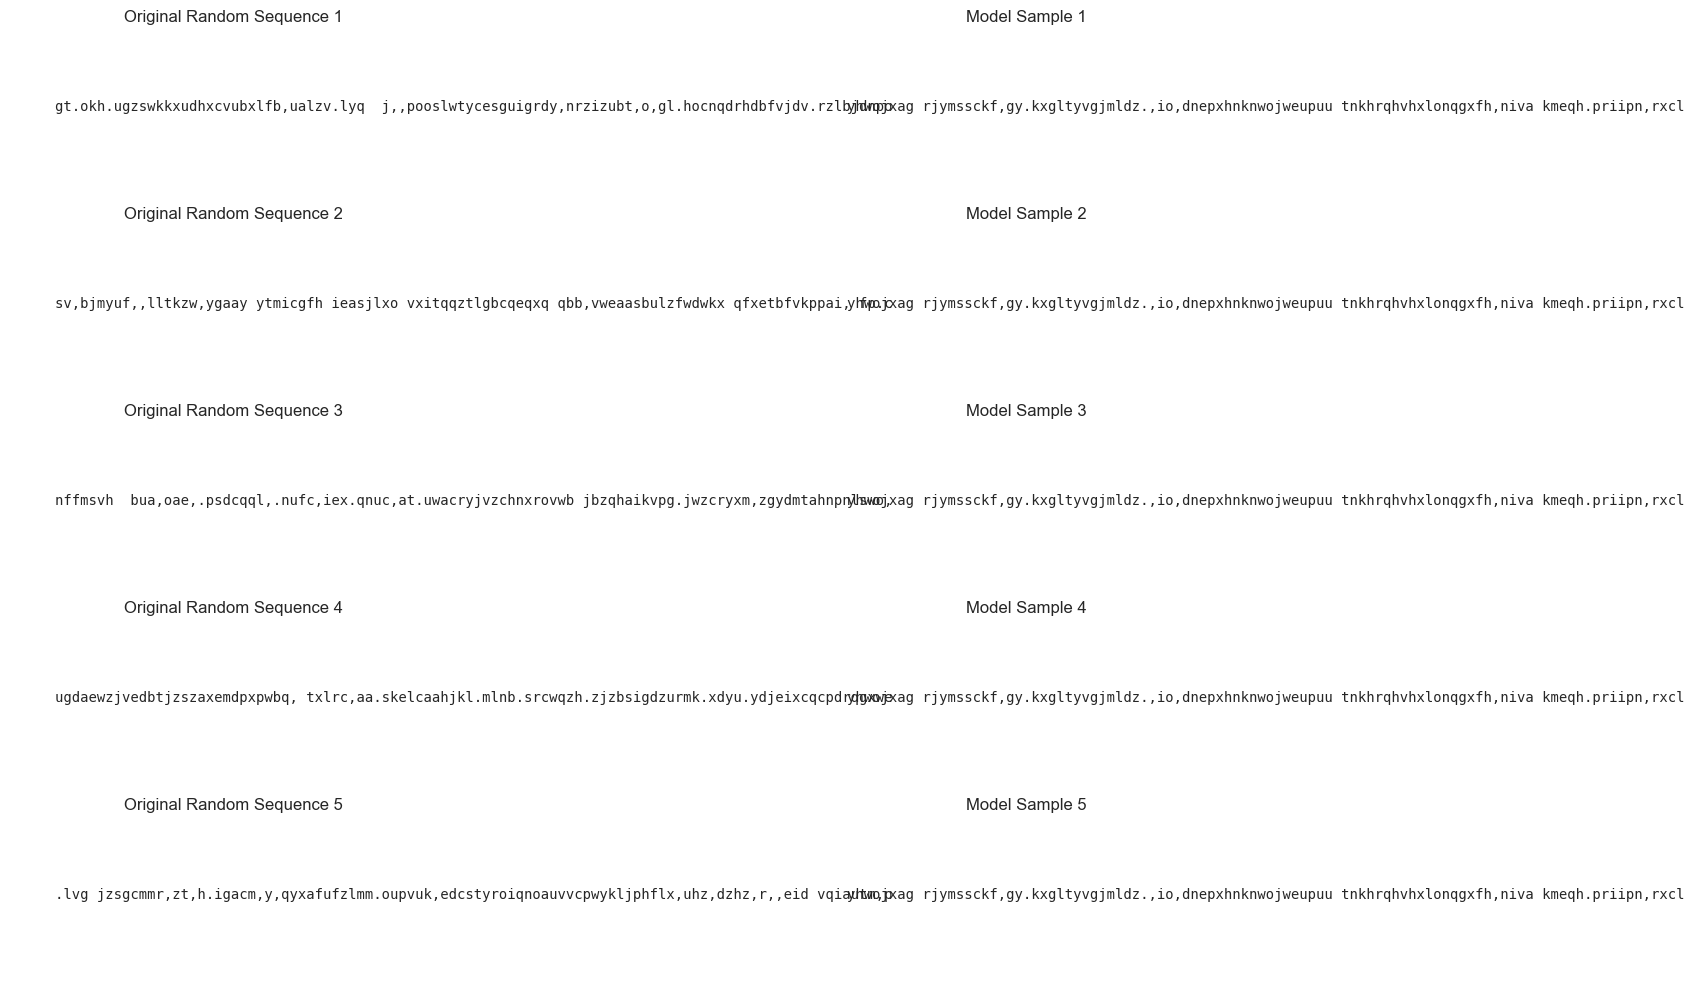

In [12]:
visualize_sequence_comparison(
    data_strings[:10],
    trained_samples[:10],
    n_examples=5
)


## 9. Analyze Patterns in Model Samples

What patterns has the model discovered?


In [13]:
print("=== Patterns in Model Samples ===")
model_stats = analyze_patterns(trained_samples, verbose=True)

print("\n=== Patterns in Random Data ===")
random_stats = analyze_patterns(data_strings[:100], verbose=True)


=== Patterns in Model Samples ===
=== Pattern Analysis ===
Total characters: 4000
Vowel ratio: 0.165
Space ratio: 0.030
Punctuation ratio: 0.080

Top 10 Bigrams:
  'wo': 60
  'oj': 60
  'jy': 40
  'ss': 40
  'sc': 40
  'y.': 40
  'o,': 40
  'ep': 40
  'px': 40
  'nk': 40

Repeating Patterns:
  'ssc': 20
  'nkn': 20
  'upu': 20
  'uu ': 20
  'hvh': 20
  'iip': 20
  'iid': 20
  'gng': 20
  'cbc': 20
  'bcb': 20

=== Patterns in Random Data ===
=== Pattern Analysis ===
Total characters: 20000
Vowel ratio: 0.170
Space ratio: 0.034
Punctuation ratio: 0.070

Top 10 Bigrams:
  'vp': 39
  'zy': 38
  'nx': 38
  'mw': 38
  'qi': 38
  't.': 37
  'vu': 36
  '.i': 36
  'ym': 36
  'gz': 35

Repeating Patterns:
  'aas': 5
  'qiq': 5
  'ttu': 5
  'hh ': 5
  'cca': 4
  'bb,': 4
  'rnr': 4
  'qql': 4
  'npn': 4
  'zwz': 4


## 10. Visualize Learned Bigram Weights

What character transitions has the model learned?


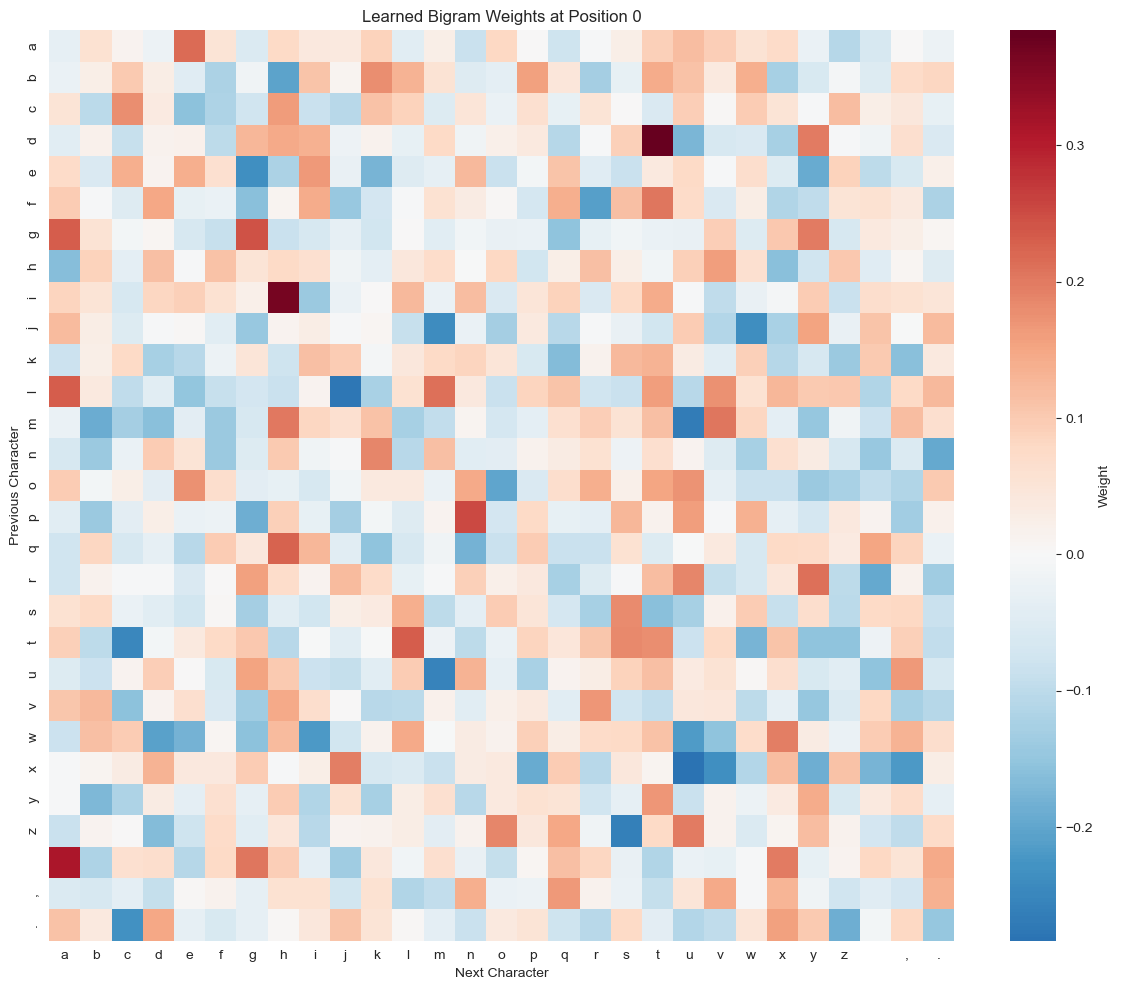

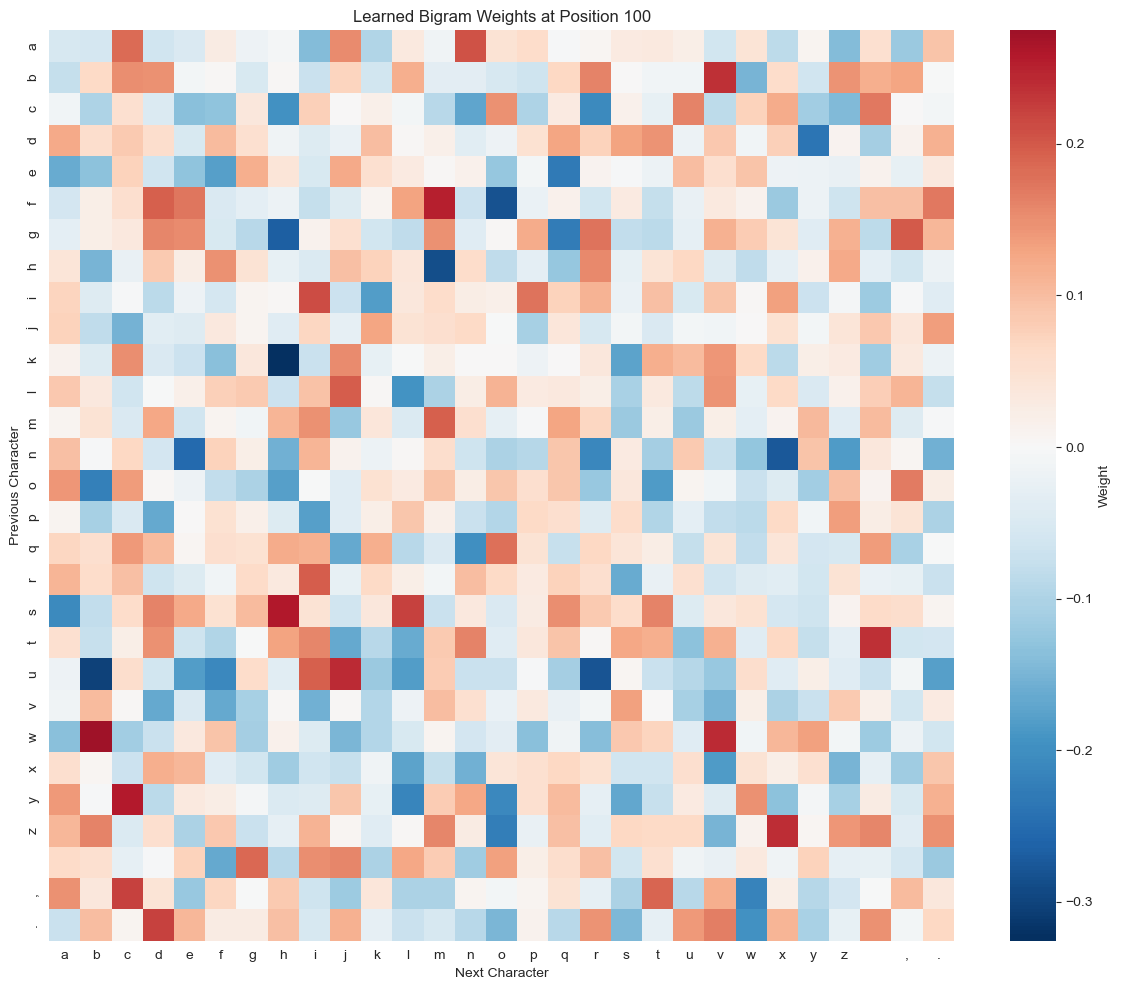

In [14]:
visualize_bigram_weights(trained_model, position=0)
visualize_bigram_weights(trained_model, position=SEQUENCE_LENGTH//2)


## 11. Pattern Emergence Analysis

Look for repeating patterns that emerged from training.


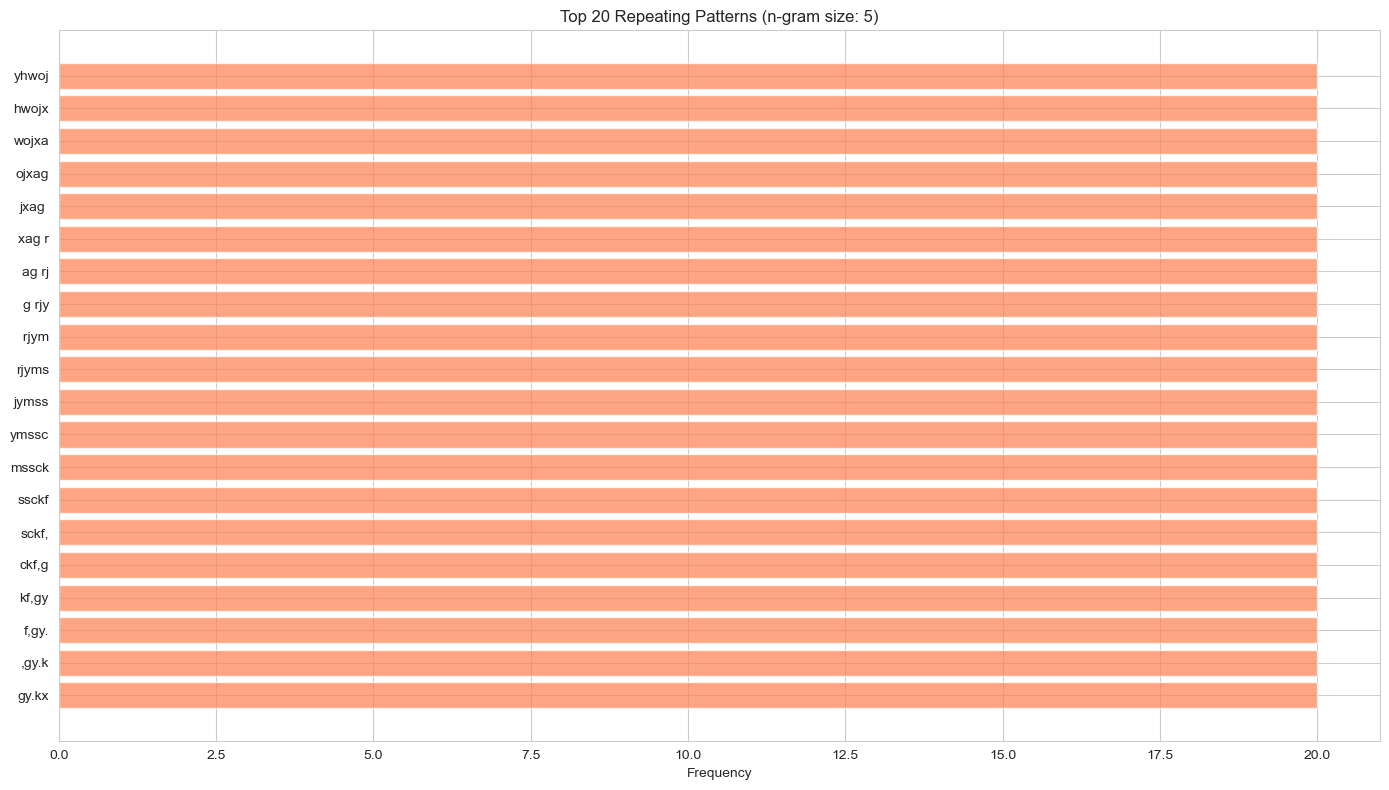

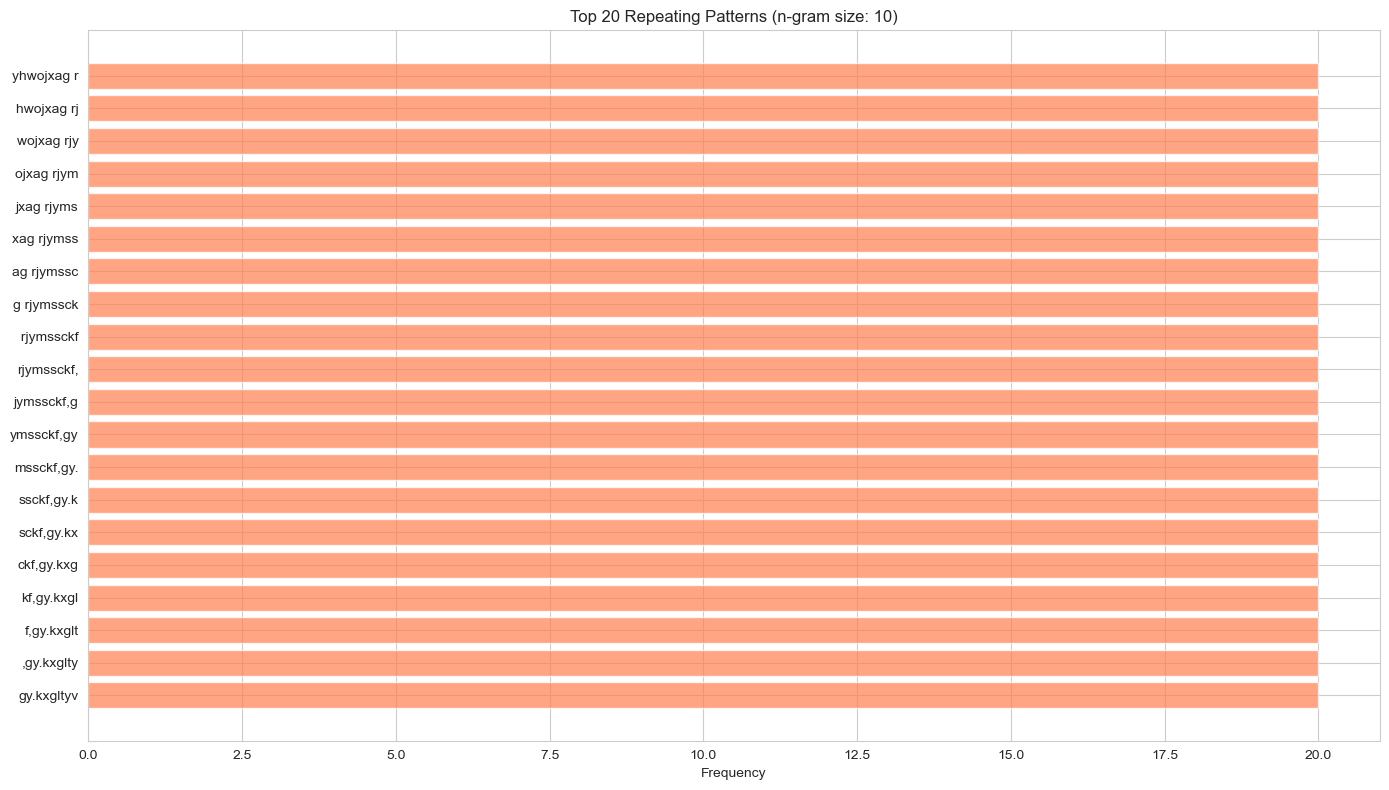

In [15]:
visualize_pattern_emergence(trained_samples, window_size=5)
visualize_pattern_emergence(trained_samples, window_size=10)


## 12. Create the Library of Babel Map

A comprehensive visualization of emergent domains and patterns.


/Users/term_/Phd/visualization.py:303: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_yticklabels(ALPHABET)


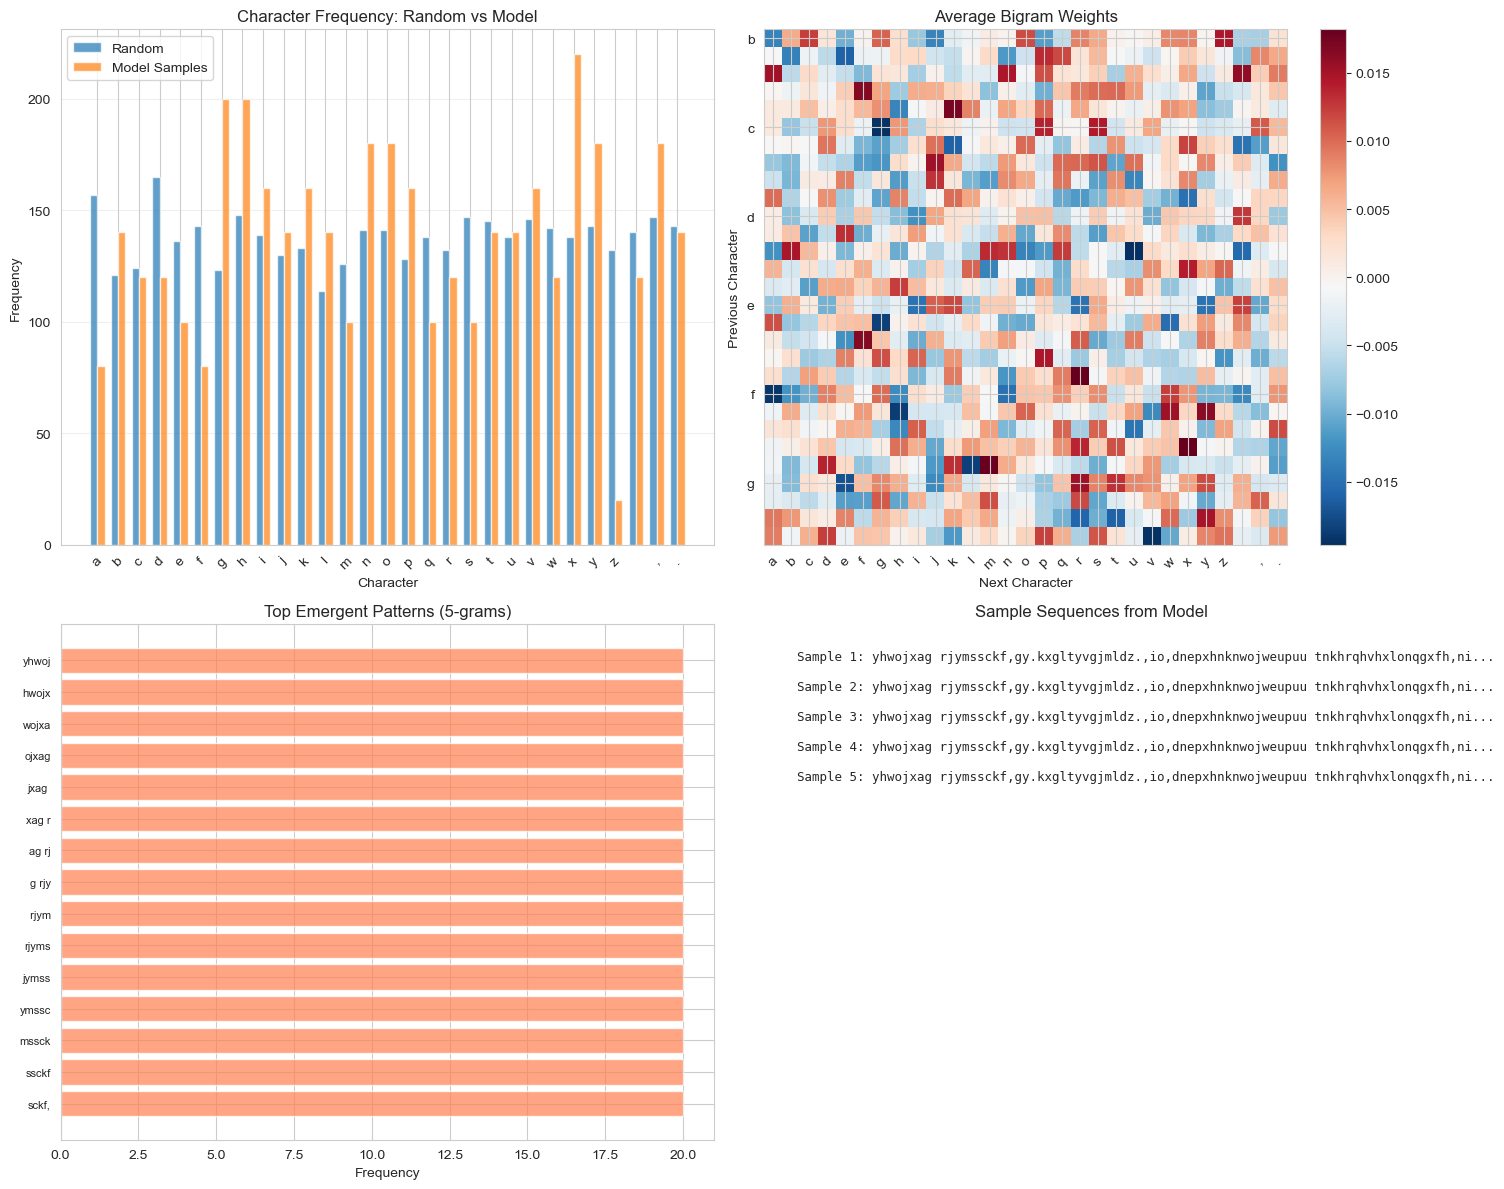

In [16]:
create_babel_map(trained_samples, trained_model, save_path="babel_map.png")


## 13. Discussion: What Did We Discover?

### Research Questions:

1. **What patterns emerged?**
   - Did the model learn to cluster vowels?
   - Did it learn space/comma positioning?
   - Are there emergent repetition patterns?

2. **Does the model "invent" meaning?**
   - Are the patterns meaningful or just statistical artifacts?
   - How does this relate to Borges's philosophical questions?

3. **What does structure-from-noise tell us?**
   - Can probabilistic computers find order in chaos?
   - What are the implications for information theory?

### Key Observations:

Write your observations here based on the visualizations above.

### Connection to Borges:

In *The Library of Babel*, Borges describes a library containing every possible book. The librarians search for meaning in this infinite chaos. Our EBM does something similar: it searches for structure in random text, learning to generate patterns that weren't explicitly programmed.

### Extropic Connection:

This project demonstrates:
- Energy-based models as structure detectors
- Gibbs sampling on factorized EBMs
- THRML-style categorical modeling
- Hardware-accelerated probabilistic computing potential

### Next Steps:

1. Extend to longer sequences
2. Add trigram interactions
3. Implement hardware-optimized sampling
4. Explore multi-scale patterns
5. Connect to information theory and Kolmogorov complexity


## 14. Experiment: Different Temperatures

How does sampling temperature affect pattern emergence?


In [17]:
temperatures = [0.5, 1.0, 1.5, 2.0]

for temp in temperatures:
    print(f"\n=== Temperature: {temp} ===")
    samples = trained_model.sample(n_samples=3, n_burnin=50, temperature=temp)
    for i, sample in enumerate(samples):
        print(f"  {i+1}. {sample[:60]}...")



=== Temperature: 0.5 ===
  1. yhwojxag rjymssckf,gy.kxgltyvgcmldo.,io,dnepxhnknbojwvu uurt...
  2. yhwojxag rjymssckf,gy.kxgltyvgcmldo.,io,dnepxhnknbojwvu uurt...
  3. yhwojxag rjymssckf,gy.kxgltyvgcmldo.,io,dnepxhnknbojwvu uurt...

=== Temperature: 1.0 ===
  1. yhwojxag rjymssckf,gy.kxgltyvgjmldz.,io,dnepxhnknwojweupuu t...
  2. yhwojxag rjymssckf,gy.kxgltyvgjmldz.,io,dnepxhnknwojweupuu t...
  3. yhwojxag rjymssckf,gy.kxgltyvgjmldz.,io,dnepxhnknwojweupuu t...

=== Temperature: 1.5 ===
  1. yhwojxag rjymssckf,getkrgltyvgjmldz.,io,dnepxanknwojweupuu t...
  2. yhwojxag rjymssckf,getkrgltyvgjmldz.,io,dnepxanknwojweupuu t...
  3. yhwojxag rjymssckf,getkrgltyvgjmldz.,io,dnepxanknwojweupuu t...

=== Temperature: 2.0 ===
  1. yhwojxay rjymssckf,gy.krg tyvgjmldz.,io,dnepxanknwojweupuu t...
  2. yhwojxay rjymssckf,gy.krg tyvgjmldz.,io,dnepxanknwojweupuu t...
  3. yhwojxay rjymssckf,gy.krg tyvgjmldz.,io,dnepxanknwojweupuu t...


## 15. Save Model and Results

Save the trained model for future use.


In [18]:
import pickle

# Save model weights
np.save("trained_weights.npy", trained_model.weights)

# Save samples
with open("trained_samples.pkl", "wb") as f:
    pickle.dump(trained_samples, f)

# Save history
with open("training_history.pkl", "wb") as f:
    pickle.dump(history, f)

print("Model and results saved!")


Model and results saved!
